In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook
from glob import glob
import os
from astropy.io import fits

In [8]:
# directory = "Data\\JWST\\MAST_2024-07-29T2157\\JWST"
# # fname = glob(directory+"\\jw05842001001_03101_00001_mirimage\\*_cal.fits")[0]
# fname = glob(directory+"\\jw05842-o001_t001_miri_f2550w\\*_i2d.fits")[0]

# fname

directory = "Data\\VLT"
fnames = glob(directory + "\\*.fits")

vlt_years = [2016, 2017, 2018, 2024]
vlt_data = {}

for i, fname in enumerate(fnames):
    vlt_data[vlt_years[i]] = fits.open(fname)

{2016: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000024713E9D710>],
 2017: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000024713E875D0>],
 2018: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000024713E8AED0>],
 2024: [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000024713702A90>]}

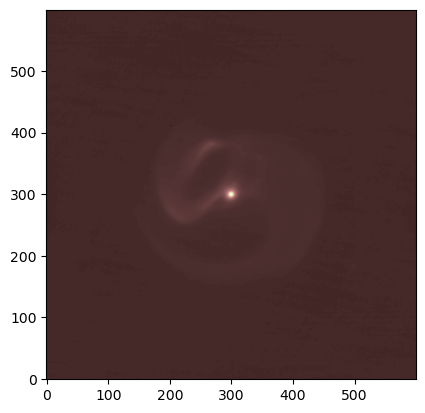

In [58]:
fig, ax = plt.subplots()
ax.imshow(vlt_data[2024][0].data, cmap='pink')
ax.invert_yaxis()

600


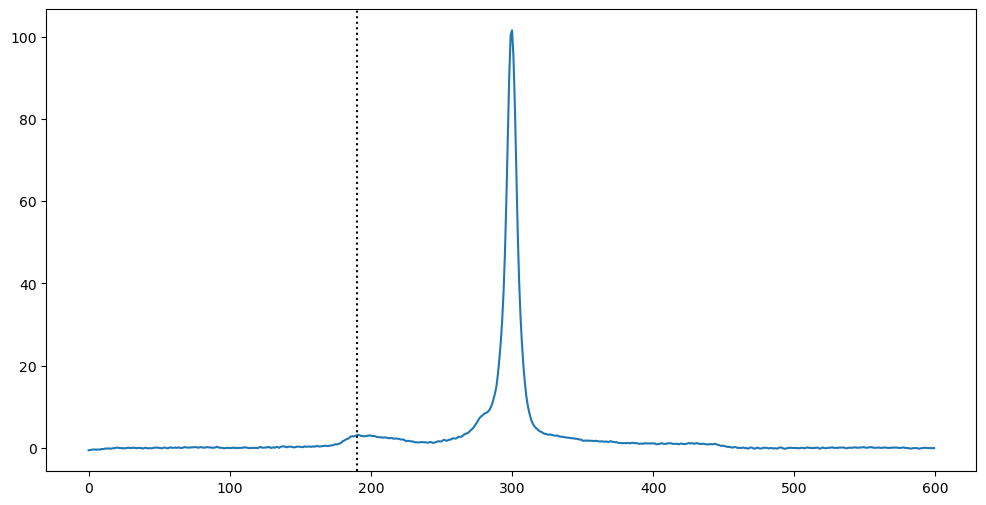

In [52]:
brightnesses = vlt_data[2024][0].data[::-1, 300]
brightnesses = vlt_data[2024][0].data[300, :]
print(len(brightnesses))
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(brightnesses)
ax.axvline(190, ls=':', c='k')

[Text(0.5, 1.0, 'Left Ridge Position Over Time'),
 Text(0.5, 0, 'Pixel Offset'),
 Text(0, 0.5, 'Norm. Brightness')]

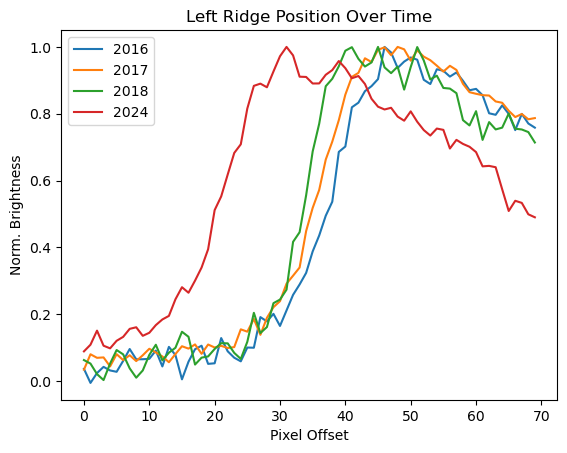

In [60]:
fig, ax = plt.subplots()
for key in vlt_data.keys():
    h = vlt_data[key][0].data[300, 160:230]
    ax.plot(h / max(h), label=str(key))
ax.legend()
ax.set(title='Left Ridge Position Over Time', xlabel='Pixel Offset', ylabel='Norm. Brightness')

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  600                                                  
NAXIS2  =                  600                                                  
EXTEND  =                    T                                                  